# Customer Churn Prediction - Exploratory Data Analysis

**Objective:** Understand the factors that drive customer churn and identify patterns for predictive modeling.

**Dataset:** IBM Telco Customer Churn  
**Author:** Anthony Nguyen  
**Date:** 15/11/2025

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print('✅ Libraries loaded successfully')

✅ Libraries loaded successfully


In [7]:
try:
    df = pd.read_csv('../data/01-raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print('✅ Data loaded successfully!\nWith shape:', df.shape)
except FileNotFoundError:
    print('❌ Data file not found. Please check the file path.')
except Exception as e:
    print(f'❌ Error loading data: {e}')


✅ Data loaded successfully!
With shape: (7043, 21)


## 2. Data Overview

In [13]:
# Basic info
print('📊 Dataset Summary')
print('=' * 50)
print(f"Total Customers: {len(df):,}")
print(f"Features: {len(df.columns) - 1}")
print(f"\nChurn Distribution:")
print(df['Churn'].value_counts(normalize=True).round(3) * 100)

📊 Dataset Summary
Total Customers: 7,043
Features: 20

Churn Distribution:
Churn
No    73.50
Yes   26.50
Name: proportion, dtype: float64


In [20]:
print('📋 Basic dataset info displayed')
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-null': df.notnull().sum(),
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

info_df

📋 Basic dataset info displayed


,Data Type,Non-null,Missing Values,Unique Values
customerID,object,7043,0,7043
gender,object,7043,0,2
SeniorCitizen,int64,7043,0,2
Partner,object,7043,0,2
Dependents,object,7043,0,2
tenure,int64,7043,0,73
PhoneService,object,7043,0,2
MultipleLines,object,7043,0,3
InternetService,object,7043,0,3
OnlineSecurity,object,7043,0,3


In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing TotalCharges: {df['TotalCharges'].isna().sum()}")
print('For NaN in TotalCharges, these are new customers with tenure = 0')
df[df['TotalCharges'].isna()][['tenure', 'MonthlyCharges', 'TotalCharges']]

Missing TotalCharges: 11
For NaN in TotalCharges, these are new customers with tenure = 0


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


## 3. Target Variable Analysis

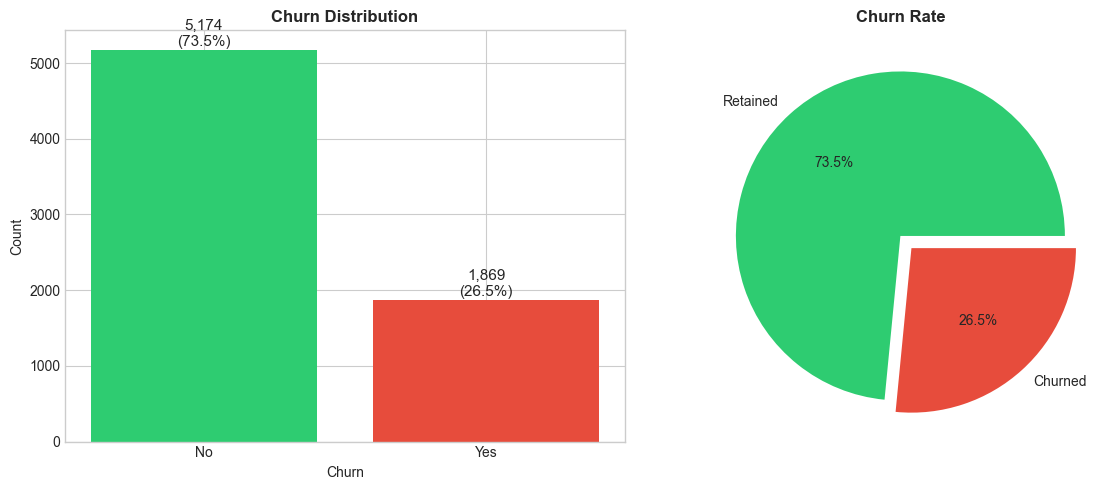


💡 INSIGHT: Class imbalance present - 26.5% churn rate
   Will need stratified sampling and appropriate evaluation metrics.


In [33]:
# Churn distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(churn_counts.index, churn_counts.values, color=colors)
axes[0].set_title('Churn Distribution', fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

for i, (idx, val) in enumerate(churn_counts.items()):
    axes[0].text(i, val + 50, f'{val:,}\n({val/len(df)*100:.1f}%)', 
                 ha='center', fontsize=11)

# Pie chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'], 
            autopct='%1.1f%%', colors=colors, explode=[0, 0.1])
axes[1].set_title('Churn Rate', fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/img/churn_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 INSIGHT: Class imbalance present - {churn_counts['Yes']/len(df)*100:.1f}% churn rate")
print("   Will need stratified sampling and appropriate evaluation metrics.")

## 4. Feature Analysis - Demographics

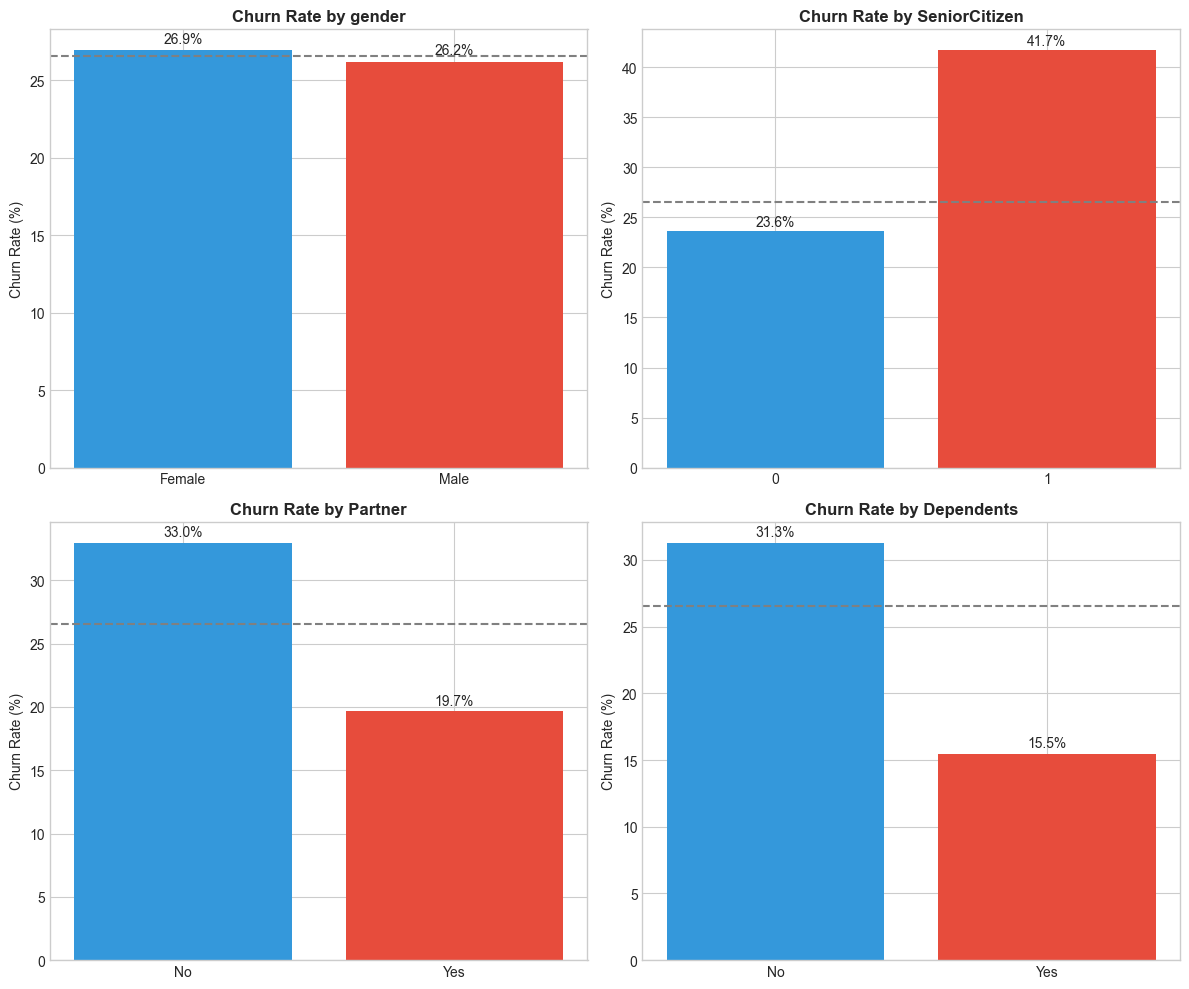


💡 INSIGHTS:
   - Gender has minimal impact on churn
   - Senior citizens churn ~40% more
   - Customers with partners/dependents churn less (more stable)


In [70]:
# Demographics vs Churn
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feat in enumerate(demo_features):
    churn_rate = df.groupby(feat)['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
    
    bars = axes[i].bar(churn_rate.index.astype(str), churn_rate.values, 
                       color=['#3498db', '#e74c3c'][:len(churn_rate)])
    axes[i].set_title(f'Churn Rate by {feat}', fontweight='bold')
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].axhline(y=df['Churn'].apply(lambda x: x=='Yes').mean()*100, 
                    color='gray', linestyle='--', label='Overall')
    
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{bar.get_height():.1f}%', ha='center')

plt.tight_layout()
plt.savefig('../docs/img/demographics_churn.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 INSIGHTS:")
print("   - Gender has minimal impact on churn")
print("   - Senior citizens churn ~40% more")
print("   - Customers with partners/dependents churn less (more stable)")